<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option("display.max_columns", None)

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
# Назовём исходный Dataframe 'hh' - сокращение от 'HeadHunter'
hh = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
hh.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Как видно из основной информации, таблица имеет:
* Размерность 44744 строки на 12 столбцов
* Только один тип данных в столбцах: object
* Очень мало пропусков в данных

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
hh.isna().sum().sort_values(ascending=False)

Опыт работы                        168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

Таблица имеет пропуски только в трёх столбцах: 'Опыт работы', 'Последняя/нынешняя должность' и 'Последнее/нынешнее место работы'. Однако надо пристальнее взглянуть на данные в столбцах, чтобы понять, что они из себя представляют, и можно ли с ними работать. 

5. Выведите основную статистическую информацию о столбцах.


In [6]:
hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


В общих чертах мы познакомились с данными, поняли их структуру. Например, теперь мы знаем, что в столбце 'Опыт работы' 4413 уникальных значений, из искомых должностей самая распространённая 'Системный администратор', а столбец 'Пол, возраст' представлен в формате <Пол , возраст , дата рождения >

Теперь можно перейти к обработке данных.

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
def get_education(edu_str):
    # Функция получает на вход строку с описанием образования, выбирает из неё три первых слова, содержащих уровень образования и возвращает строку 
    # с этим уровнем образования('высшее', 'неоконченное высшее', 'среднее', 'среднее специальное')
    
    edu_list = edu_str.lower().split()[:3]
    
    if edu_list[-1] == 'образование':
        # если последнее слово из трёх 'образование', возвращаем первые два слова
        return edu_list[0] + ' ' + edu_list[1]
        # если последнее слово какое-то ещё, значит, уровень образования состоит из одного слова. Возвращаем его
    else:
        return edu_list[0]
    
# Преобразуем столбец "Образование и ВУЗ" и проверим получившийся результат

hh['Образование'] = hh['Образование и ВУЗ'].apply(get_education)
hh['Образование'].value_counts(dropna=False)   

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

In [8]:
# Удалим столбец 'Образование и ВУЗ'
hh = hh.drop('Образование и ВУЗ', axis=1)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:
# Создадим признак 'Пол'. Для этого просто возьмём первый символ из признака 'Пол, возраст'
hh['Пол'] = hh['Пол, возраст'].apply(lambda s: s[0])
# Посмотрим на получившиеся значения в столбце
display(hh['Пол'].value_counts(normalize=True))

# Создадим признак 'Возраст'. Для этого разделим строку из признака 'Пол, возраст' по разделителям-запятым и возьмём второй элемент(с возрастом)
# Затем этот элемент разделим по разделителям-пробелам и возьмём первый элемент (саму цифру). И преобразуем к формату int.
hh['Возраст'] = hh['Пол, возраст'].apply(lambda s: int(s.split(',')[1].split()[0]))

# Выведем на экран средний возраст соисателей в базе
print('Средний возраст соискателей:', round(hh['Возраст'].mean(), 2))

М    0.809293
Ж    0.190707
Name: Пол, dtype: float64

Средний возраст соискателей: 32.2


In [10]:
# Удалим столбец 'Пол, возраст'
hh = hh.drop('Пол, возраст', axis=1)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
def get_experience(exp_str):
    
    # Функция получает на вход строку c опытом работы и возвращает опыт работы в месяцах в формате int
    
    # Если есть пропуски или опыт работы не указан, возвращаем значение None
    if exp_str is np.nan or exp_str == 'Не указано':
        return np.nan
    
    # Если опыт работы указан, разделяем строку по разделителю-пробелу, убираем стандартные слова 'Опыт работы' и обрезаем всю лишнюю информацию
    exp_list = exp_str.split()[2:6]
       
    # Суммарный опыт в месяцах
    exp_sum = 0

    for i in [1, 3]:
        # Проверяем на наличие ключевых слов на ключевых позициях (ОБРАЗЕЦ: 3 года 2 месяца) и прибавляем к суммарному опыту соотвествующее количество месяцев
        if exp_list[i] in ['месяц', 'месяцев', 'месяца']:
            exp_sum += int(exp_list[i-1])
        if exp_list[i] in ['год', 'года', 'лет']:
            exp_sum += int(exp_list[i-1]) * 12
            
    return exp_sum
    
# Создадим столбец 'Опыт работы (месяц)'
hh['Опыт работы (месяц)'] = hh['Опыт работы'].apply(get_experience)

# Найдём медианное значение опыта работы
print('Медианное значение опыта работы:', hh['Опыт работы (месяц)'].median())


Медианное значение опыта работы: 100.0


In [12]:
# Удалим столбец 'Опыт работы'
hh = hh.drop('Опыт работы', axis=1)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [13]:
def get_city(city_str):
    # Функция получает на вход строку из столбца 'Город, переезд, командировки' и возвращает:
    # - 'Москва', если город Москва
    # - 'Санкт_Петербург', если город Санкт-Петербург
    # - 'город-миллионник', если город из списка городов-миллионников
    # - 'другие', если город другой
    
    # Список городов-миллионников
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    
    # Выделяем из строки город и удаляем пробелы
    city = city_str.split(',')[0].replace(' ', '')   
    
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    
    elif city in million_cities:
        return 'город-миллионник'
    
    else:
        return 'другие'
    
    
def get_removal(removal_str):
    # Функция получает на вход строку из столбца 'Город, переезд, командировки' и возвращает флаг готовности к переезду
    if ('перее' in removal_str):
        if ('не готов к переезду' in removal_str) or('не готова к переезду' in removal_str):
            return False
        else:        
            return True
    else:
        return False


def get_busyness_trip(trip_str):
    # Функция получает на вход строку из столбца 'Город, переезд, командировки' и возвращает флаг готовности к командировкам
    if ('командировка' in trip_str):
        if ('не готов к командировкам' in trip_str) or('не готова к командировкам' in trip_str):
            return False
        else:        
            return True
    else:
        return False


# Создаём признак 'Город' и проверяем значения в нём
hh['Город'] = hh['Город, переезд, командировки'].apply(get_city)
display(hh['Город'].value_counts(normalize=True))

#Создаём признаки 'Готовность к переезду' и 'Готовность к командировкам'
hh['Готовность к переезду'] = hh['Город, переезд, командировки'].apply(get_removal)
hh['Готовность к командировкам'] = hh['Город, переезд, командировки'].apply(get_busyness_trip)

# Найдём, какой процент соискателей готов одновременно и к переездам, и к командировкам
display(hh[['Готовность к переезду', 'Готовность к командировкам']].value_counts(normalize=True))


Москва              0.371469
другие              0.367692
город-миллионник    0.150501
Санкт-Петербург     0.110339
Name: Город, dtype: float64

Готовность к переезду  Готовность к командировкам
False                  True                          0.388477
True                   True                          0.318657
False                  False                         0.253375
True                   False                         0.039491
dtype: float64

In [14]:
# Удалим столбец 'Город, переезд, командировки'
hh = hh.drop('Город, переезд, командировки', axis=1)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [15]:
# Список возможной желаемой занятости
workload = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
# Список возможных графиков работы
schedule = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']

# Создадим One Hot Encoding для занятости
for col in workload:
    hh[col] = hh['Занятость'].apply(lambda w: True if col in w else False)
    
# Создадим One Hot Encoding для графика работы
for col in schedule:
    hh[col] = hh['График'].apply(lambda s: True if col in s else False)

# Узнаем, сколько людей ищут проектную работу и волонтёрство    
display(hh[['проектная работа', 'волонтерство']].value_counts())
# Узнаем, сколько людей хотят работать вахтовым методом и с гибким графиком
display(hh[['вахтовый метод', 'гибкий график']].value_counts())

проектная работа  волонтерство
False             False           36626
True              False            7632
                  True              436
False             True               50
dtype: int64

вахтовый метод  гибкий график
False           False            28387
                True             13273
True            True              2311
                False              773
dtype: int64

In [16]:
# Удалим столбцы 'График' и 'Занятость'
hh = hh.drop(['График', 'Занятость'], axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [17]:
# Подготовим таблицу с соискателями к присоединению

def get_iso_currency(currency):
    # Фунцкция получает на вход название валюты(строка) и возвращает её ISO-кодировку(строка)
    if currency == 'руб.':
        return 'RUR'
    elif currency == 'бел.руб.':
        return 'BYN'
    elif currency == 'грн.':
        return 'UAH'
    elif currency == 'сум':
        return 'UZS'
    else:
        return currency

# Разделим столбец 'ЗП' на два, с суммой и валютой.
hh['Сумма ЗП'] = hh['ЗП'].apply(lambda x: int(x.split()[0]))
hh['currency'] = hh['ЗП'].apply(lambda x: x.split()[1])
# Преобразуем название валюты в её ISO-кодировку
hh['currency'] = hh['currency'].apply(get_iso_currency)

# Выделим дату в столбце 'Обновление резюме' и переведём в формат datetime
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме']).dt.date
hh['date'] = hh['Обновление резюме'].astype('datetime64[ns]')


# Загрузим таблицу с курсами обмена
exchange_rates = pd.read_csv('data/ExchangeRates.csv')
# Удалим ненужные нам столбцы
exchange_rates = exchange_rates.drop(['per', 'time', 'vol'], axis=1)
# Преобразуем дату в столбце 'date' в формат datetime
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'])

# Сделаем объединение таблиц по столбцам 'currency' и 'date'
hh_full = hh.merge(
    exchange_rates,
    on = ['currency', 'date'],
    how = 'left'
)
# Заполним единицами пропуски, образовавшиеся при объединении там, где зарплата была указана в рублях
hh_full['close'] = hh_full['close'].fillna(1)
hh_full['proportion'] = hh_full['proportion'].fillna(1)

# Создадим новый столбец с зарплатой в рублях, переведя все остальные валюты по курсу
hh_full['ЗП (руб)'] = (hh_full['Сумма ЗП'] * hh_full['close']) / hh_full['proportion']
# Посмотрим на начало получившейся таблицы
hh_full.head()


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Сумма ЗП,currency,date,close,proportion,ЗП (руб)
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False,True,True,True,False,False,True,True,True,False,True,29000,RUR,2019-04-16,1.0,1.0,29000.0
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,высшее,М,60,233.0,другие,False,True,True,True,True,False,False,True,True,True,False,False,40000,RUR,2019-12-04,1.0,1.0,40000.0
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,False,False,True,False,False,False,False,True,False,False,False,False,20000,RUR,2019-04-16,1.0,1.0,20000.0
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-08-04,Не указано,высшее,М,38,225.0,другие,False,True,True,True,True,False,False,False,False,True,False,False,100000,RUR,2019-08-04,1.0,1.0,100000.0
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,False,True,True,False,False,False,False,True,False,False,False,False,140000,RUR,2019-04-22,1.0,1.0,140000.0


In [18]:
# Теперь удалим из таблицы все уже не нужные нам столбцы
hh_full = hh_full.drop(['ЗП', 'Сумма ЗП', 'currency', 'date', 'close', 'proportion'], axis=1)
# Посмотрим информацию о получившейся таблице
hh_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

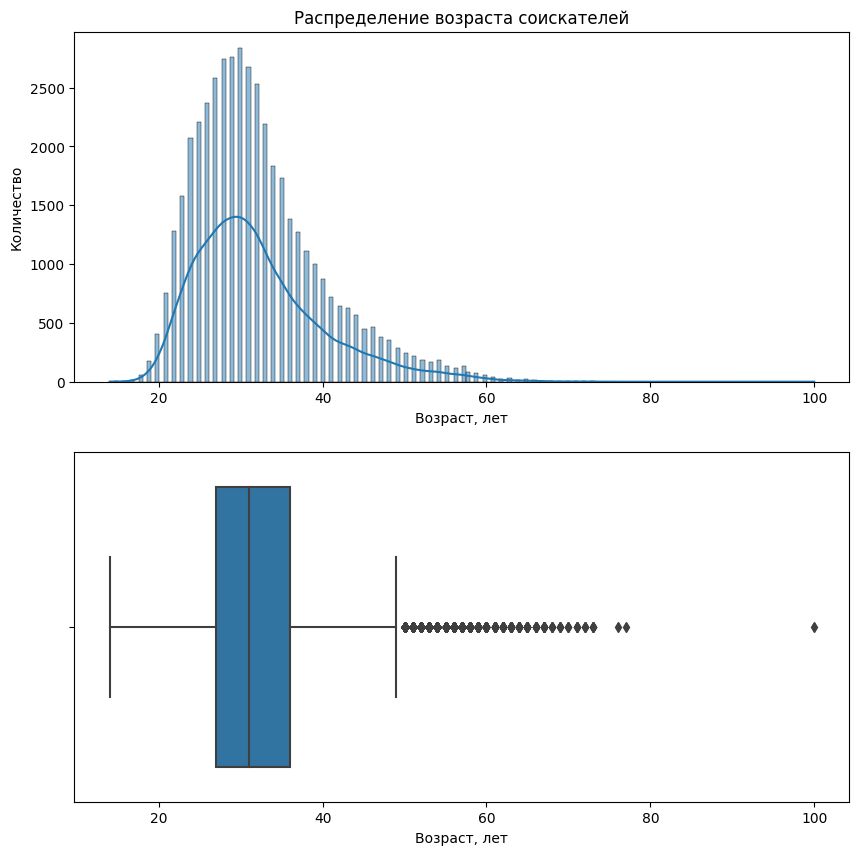

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
                         
histplot = sns.histplot(
    data=hh_full,
    x='Возраст',
    kde=True,
    ax=axes[0]
);
histplot.set_title('Распределение возраста соискателей');
histplot.set_xlabel('Возраст, лет');
histplot.set_ylabel('Количество');

boxplot = sns.boxplot(
    data=hh_full,
    x='Возраст',
    orient='h',
    ax=axes[1]
);
boxplot.set_xlabel('Возраст, лет');

In [20]:
# Мода распределения
print('Модальное значение возраста соискателей:', hh_full['Возраст'].mode()[0])

# Минимальное, максимальное значение возраста соискателей
print('Минимальное значение возраста соискателей:', hh_full['Возраст'].min())
print('Максимальное значение возраста соискателей:', hh_full['Возраст'].max())

Модальное значение возраста соискателей: 30
Минимальное значение возраста соискателей: 14
Максимальное значение возраста соискателей: 100


Выводы по графику
1. Распределение по своему виду близко к логнормальному с пиком (модой) в возрасте 30 лет
2. Предельные значения возраста соискателей 14 и 100 лет, большинство же находится в возрасте примерно 25-35 лет
3. Хотя коробчатая диаграмма помечает как выбросы всех старше примерно 50 лет, к этому нужно отнестись с очень большой осторожностью, потому что наверняка и после пятидесяти люди ищут работу. Нужно внимательнее исследовать этих кандидатов, чтобы принять взвешенное решение. К откровенным аномалиям можно отнести только соискателя в возрасте 100 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

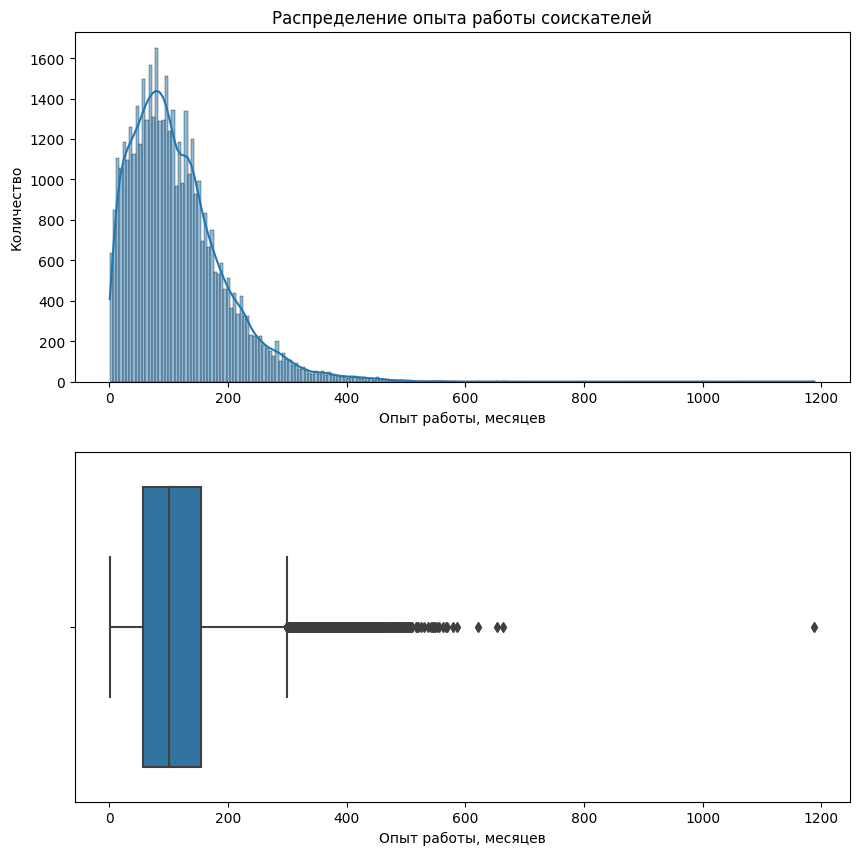

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
                         
histplot = sns.histplot(
    data=hh_full,
    x='Опыт работы (месяц)',
    kde=True,
    ax=axes[0]
);
histplot.set_title('Распределение опыта работы соискателей');
histplot.set_xlabel('Опыт работы, месяцев');
histplot.set_ylabel('Количество');

boxplot = sns.boxplot(
    data=hh_full,
    x='Опыт работы (месяц)',
    orient='h',
    ax=axes[1]
);
boxplot.set_xlabel('Опыт работы, месяцев');

In [22]:
# Мода распределения
print('Модальное значение опыта работы соискателей:', hh_full['Опыт работы (месяц)'].mode()[0])

# Минимальное, максимальное значение опыта работы соискателей
print('Минимальное значение возраста соискателей:', hh_full['Опыт работы (месяц)'].min())
print('Максимальное значение возраста соискателей:', hh_full['Опыт работы (месяц)'].max())

Модальное значение опыта работы соискателей: 81.0
Минимальное значение возраста соискателей: 1.0
Максимальное значение возраста соискателей: 1188.0


Выводы по графику
1. Распределение по своему виду близко к логнормальному с пиком (модой) опыта работы в 81 месяц.
2. Предельные значения опыта работы соискателей 1 и 1188 месяцев, большинство же находится в интервале примерно 50-150 месяцев.
3. Коробчатая диаграмма помечает как выбросы всех с опытом работы больше 300 месяцев (25 лет), Но к этому нужно отнестись с очень большой осторожностью, потому что наверняка есть люди с таким трудовым стажем. Нужно рассматривать этот признак в связке с возрастом. К явным аномалиям с первого взгляда можно отнести только 1188 месяцев опыта работы (99 лет)

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


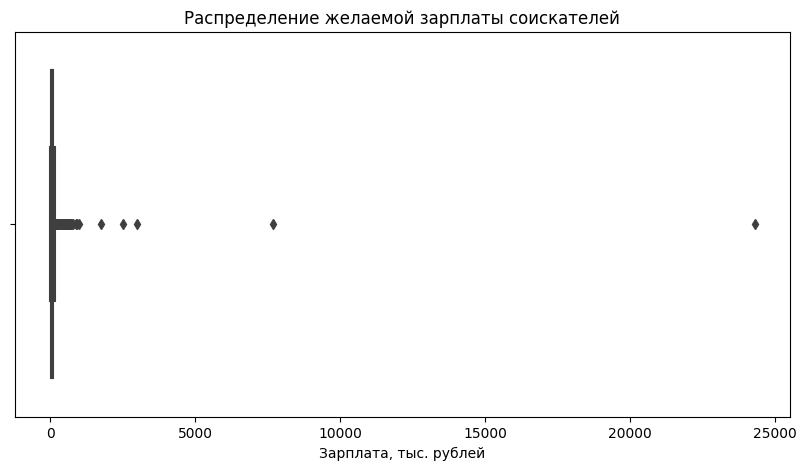

In [23]:
fig = plt.figure(figsize=(10, 5))
                         
boxplot = sns.boxplot(
    data=hh_full,
    x=hh_full['ЗП (руб)'] / 1000,
    orient='h'
);
boxplot.set_title('Распределение желаемой зарплаты соискателей');
boxplot.set_xlabel('Зарплата, тыс. рублей');

In [24]:
# Взглянем на характеристики распределения
# Мода распределения
print('Модальное значение желаемой зарплаты соискателей:', hh_full['ЗП (руб)'].mode()[0])

# Минимальное, максимальное значение опыта работы соискателей
print('Минимальное значение желаемой зарплаты соискателей:', hh_full['ЗП (руб)'].min())
print('Максимальное значение желаемой зарплаты соискателей:', hh_full['ЗП (руб)'].max())

Модальное значение желаемой зарплаты соискателей: 50000.0
Минимальное значение желаемой зарплаты соискателей: 1.0
Максимальное значение желаемой зарплаты соискателей: 24304876.0


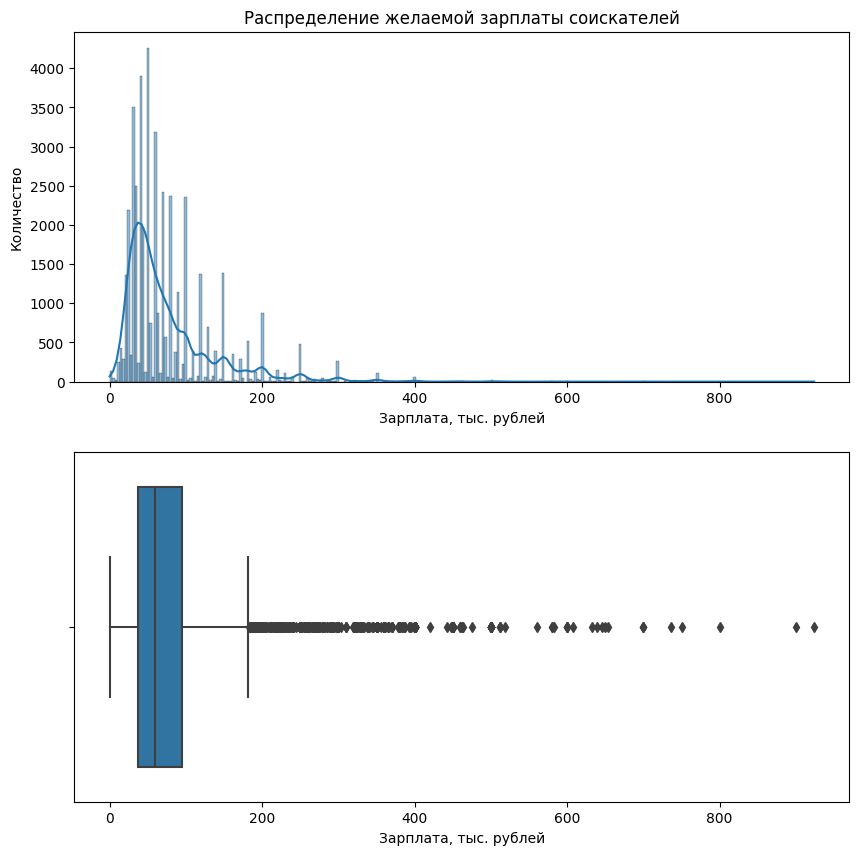

In [25]:
# Как видим из графика выше, в признаке есть сильные выбросы, из-за которых невозможно посмотреть на распределение.
# Для удобства возьмём только соискателей с желаемой зарплатой меньше миллиона рублей
hh_salary = hh_full[hh_full['ЗП (руб)'] < 1_000_000]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
                    
histplot = sns.histplot(
    data=hh_salary,
    x=hh_salary['ЗП (руб)'] / 1000,
    kde=True,
    ax=axes[0]
);
histplot.set_title('Распределение желаемой зарплаты соискателей');
histplot.set_xlabel('Зарплата, тыс. рублей');
histplot.set_ylabel('Количество');

boxplot = sns.boxplot(
    data=hh_salary,
    x=hh_salary['ЗП (руб)'] / 1000,
    orient='h',
    ax=axes[1]
);
boxplot.set_xlabel('Зарплата, тыс. рублей');

Выводы по графику
1. Распределение по своему виду напоминает логнормальное с пиком (модой) желаемой зарплаты в 50000 рублей в месяц.
2. Предельные значения опыта работы соискателей 1 рубль и 24,3 миллиона рублей, большинство же находится в интервале примерно 30-100 тысяч рублей.
3. Коробчатая диаграмма помечает как выбросы всех с желаемой зарплатой больше 200 тысяч рублей. Стоит более подробно присмотреться к этим соискателям, возможно, среди них есть уникальные специалисты. К тому же, их достаточно много, и если удалить их всех, может пострадать точность модели. К аномалиям стоит отнести всех с зарплатой больше миллиона рублей (пять человек) и аномально низкой зарплатой (например, один рубль)

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

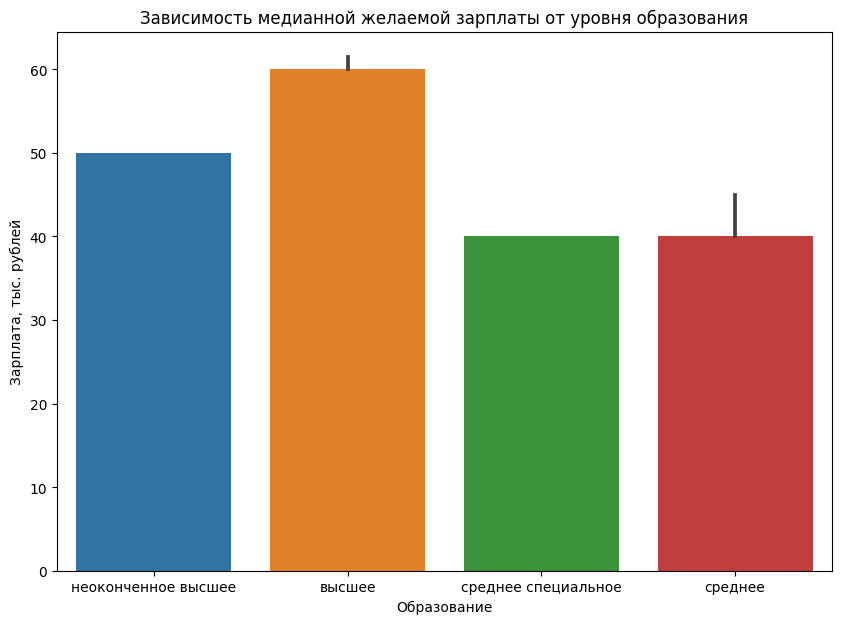

In [26]:
# Построим многоуровневую столбчатую диаграмму, показывающую найденные зависимости
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=hh_salary,
    x='Образование',
    estimator='median',
    y=hh_salary['ЗП (руб)'] / 1000
);
barplot.set_title('Зависимость медианной желаемой зарплаты от уровня образования');
barplot.set_xlabel('Образование');
barplot.set_ylabel('Зарплата, тыс. рублей');

Выводы по диаграмме
1. Наибольшие уровни желаемой заработной платы наблюдаются у соискателей с высшим образованием. Наименьшие уровни, соответственно, у соискателей со средним и средним специальным образованием. Соискатели с неоконченным высшим претендуют на зарплату меньше, чем соискатели с законченным высшим, но выше, чем соискатели со средним образованием.
2. Существенной разницы между средним и средним специальным образованием нет. Однако разница между средними и высшими образованиями заметна невооружённым взглядом. Можно сказать, что уровень образования является довольно важным признаком

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

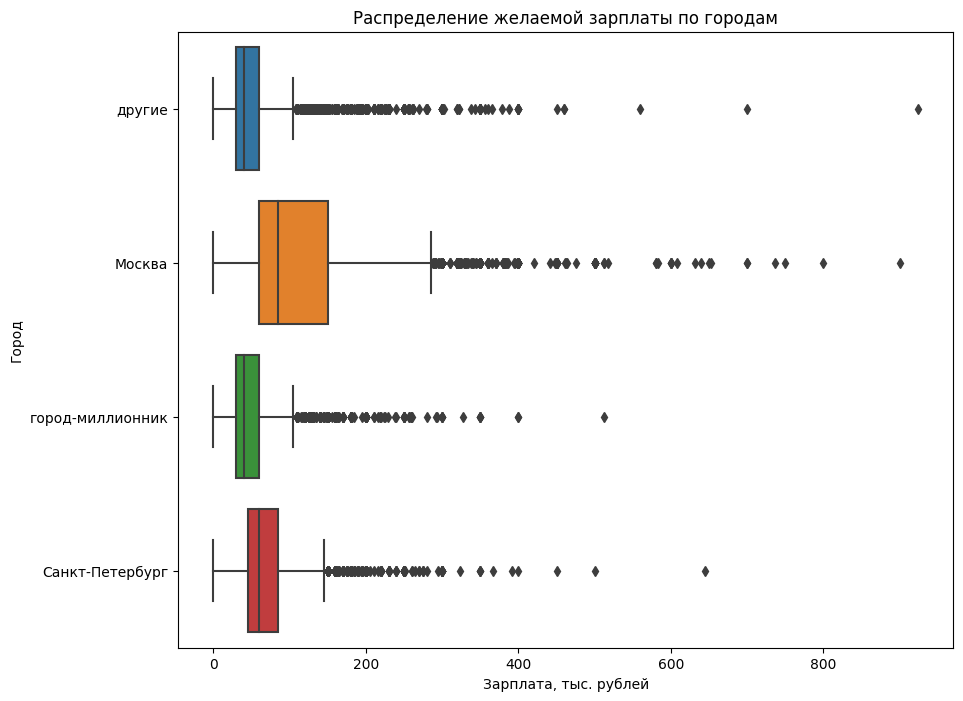

In [27]:
fig = plt.figure(figsize=(10, 8))
boxplot = sns.boxplot(
    data=hh_salary,
    x=hh_salary['ЗП (руб)'] / 1000,
    y='Город',
    orient='h'
);
boxplot.set_title('Распределение желаемой зарплаты по городам');
boxplot.set_xlabel('Зарплата, тыс. рублей');

Выводы по диаграмме
1. На первом месте по медианной зарплате и размаху Москва, на втором месте Санкт-Петербург, в двух других категориях распределение примерно одинаковое.
2. Признак 'Город' очень важен при прогнозировании заработной платы, поскольку соискатели в Москве и Санкт-Петербурге могут рассчитывать на больший уровень заработной платы

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

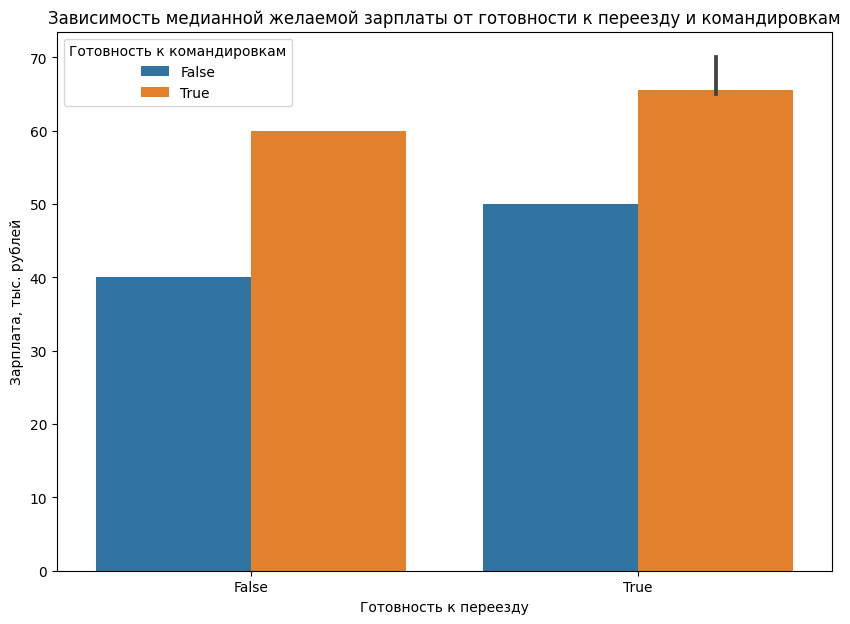

In [28]:
# Построим многоуровневую столбчатую диаграмму, показывающую найденные зависимости
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=hh_salary,
    x='Готовность к переезду',
    estimator='median',
    y=hh_salary['ЗП (руб)'] / 1000,
    hue='Готовность к командировкам'
);
barplot.set_title('Зависимость медианной желаемой зарплаты от готовности к переезду и командировкам');
barplot.set_xlabel('Готовность к переезду');
barplot.set_ylabel('Зарплата, тыс. рублей');

In [29]:
# Найдём медианную зарплату соискателей, готовых к переезду и к командировкам
mask = (hh_full['Готовность к переезду'] == True) & (hh_full['Готовность к командировкам'] == True)
hh_full[mask]['ЗП (руб)'].median()

65849.455

Выводы по диаграмме

Оба признака показывают достаточно сильную разницу по желаемой зарплате между категориями. Можно сделать вывод, что оба признака важны для нашей модели.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

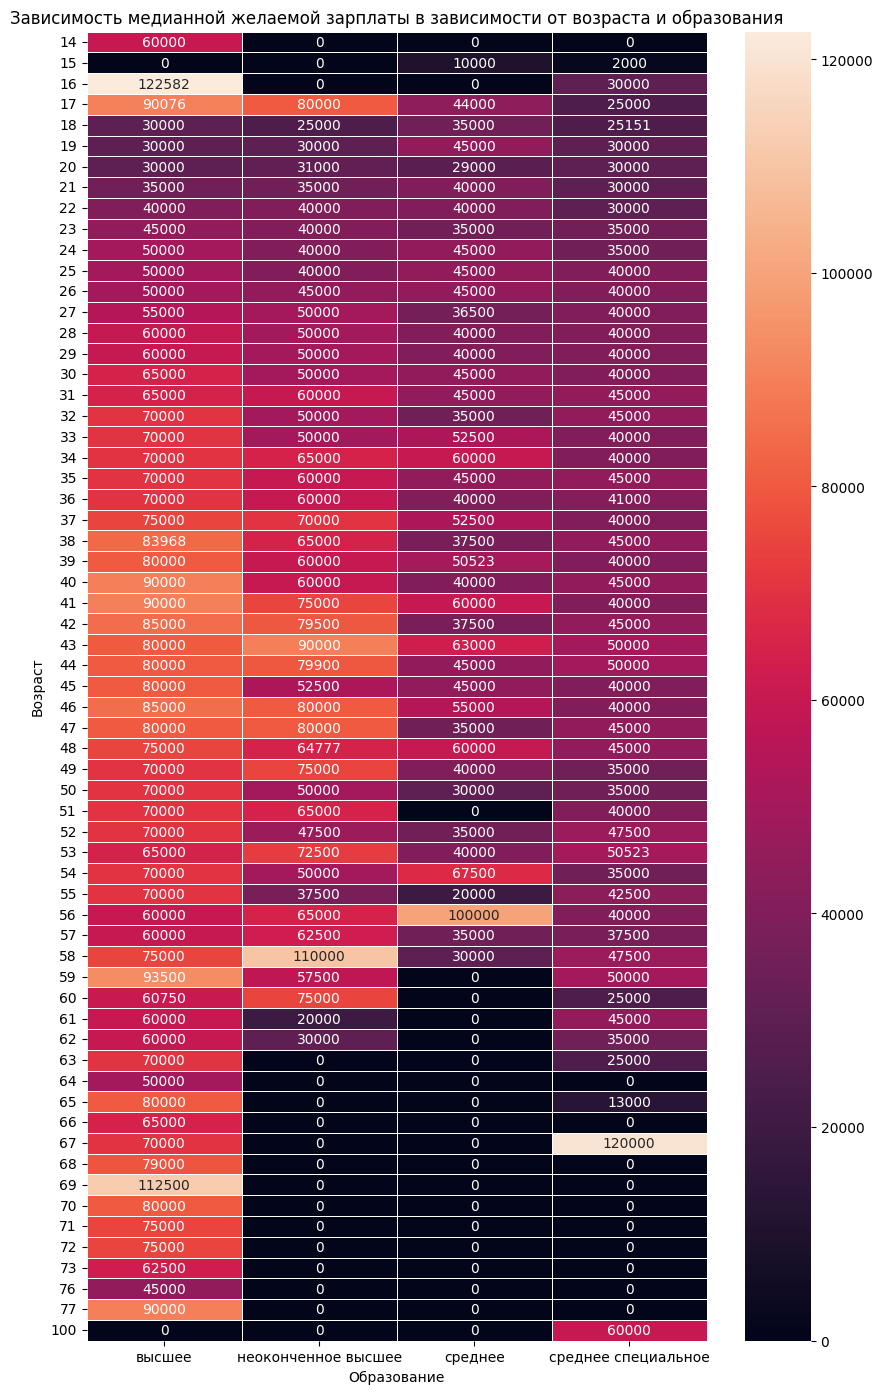

In [30]:
hh_pivot = hh_full.pivot_table(
values='ЗП (руб)',
index='Возраст',
columns='Образование',
aggfunc='median',
fill_value = 0
)

# Строим тепловую карту с процентом ушедших клиентов по категориям
fig = plt.figure(figsize=(10, 17))
heatmap = sns.heatmap(
    hh_pivot,
    annot=True,
    linewidth=.5,
    fmt=".0f",
);
heatmap.set_title('Зависимость медианной желаемой зарплаты в зависимости от возраста и образования');
heatmap.set_xlabel('Образование');
heatmap.set_ylabel('Возраст');

Выводы по тепловой карте

Самый быстрый рост желаемой зарплаты наблюдается у соискателей с высшим образованием. В то же время в этой категории мы видим соискателей более старшего возраста, чем в других категориях. На втором месте по росту зарплаты неоконченное высшее. В среднем и среднем специальном образованиях сильного роста ожидаемой зарплаты не наблюдается. Что вполне согласуется с выводами, сделанными ранее.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

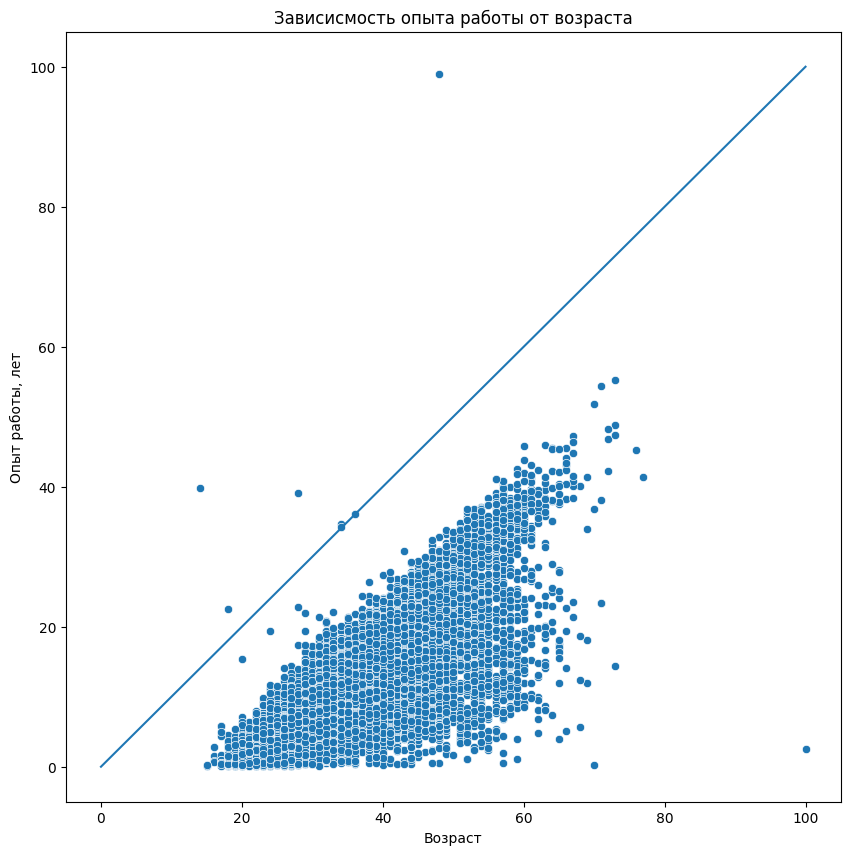

In [31]:
fig = plt.figure(figsize=(10, 10))
scatterplot = sns.scatterplot(
    data=hh_full,
    x='Возраст',
    y=hh_full['Опыт работы (месяц)'] / 12
);

# Добавим линию, показывающую опыт работы, равный возрасту. 
sns.lineplot(x=[0, 100], y=[0, 100])

scatterplot.set_title('Зависисмость опыта работы от возраста');
scatterplot.set_xlabel('Возраст');
scatterplot.set_ylabel('Опыт работы, лет');

Выводы по диаграмме

На графике чётко видно 7 точек соискателей, у которых опыт работы больше или равен возрасту. Это - явные аномалии, которые будут мешать работе нашей модели. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Text(0, 0.5, 'Зарплата, тыс. рублей')

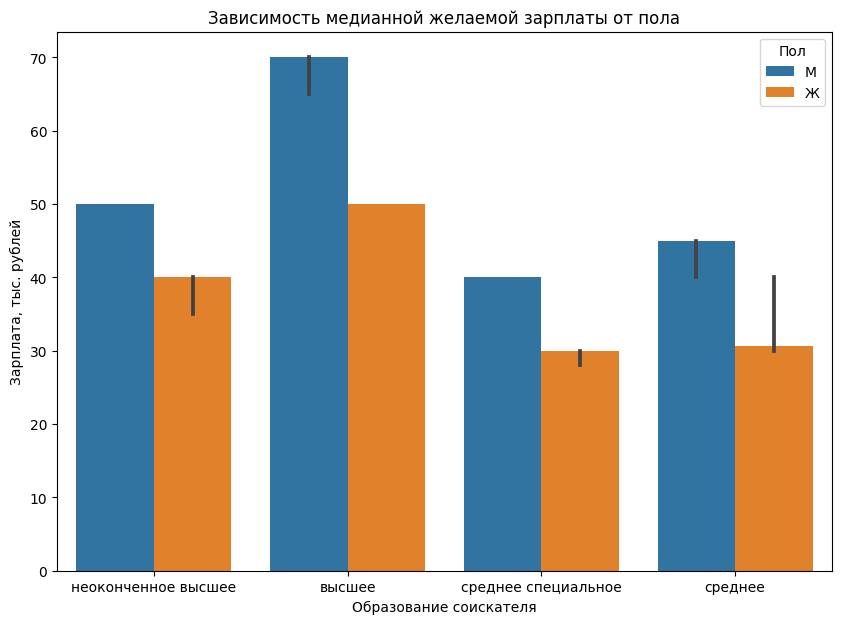

In [32]:
# Построим многоуровневую столбчатую диаграмму, показывающую зависимость медианной желаемой заработной платы от образования соискателя с учётом пола 
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=hh_salary,
    x='Образование',
    estimator='median',
    y=hh_salary['ЗП (руб)'] / 1000,
    hue='Пол'
);
barplot.set_title('Зависимость медианной желаемой зарплаты от пола')
barplot.set_xlabel('Образование соискателя')
barplot.set_ylabel('Зарплата, тыс. рублей')

Выводы по диаграмме

Наблюдается довольно ощутимая разница между желаемыми зарплатами для женщин и для мужчин для всех уровней образования. Для точного ответа, почему так происходит, нужно провести дополнительное исследование. Может быть, женщины и мужчины на одинаковых должностях получают меньшую зарплату или женщины в принципе занимают менее оплачиваемые должности, чем мужчины. Или могут быть ещё какие-то факторы. Но для нашей модели это может стать одним из важных признаков вне зависимости от причин.

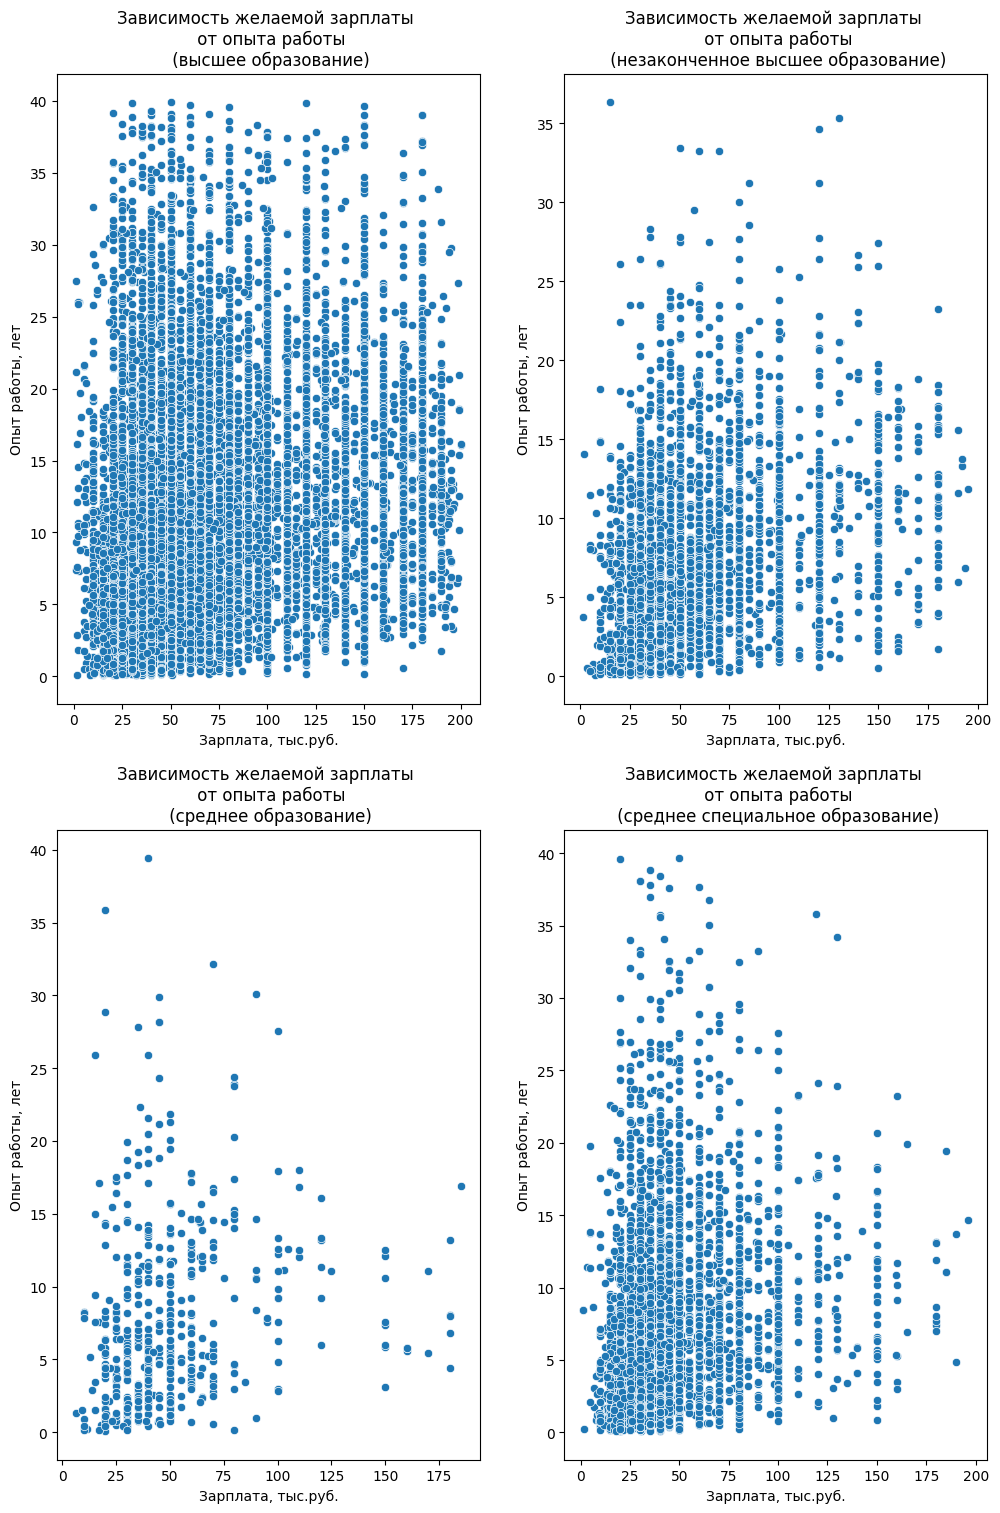

In [33]:
# Попробуем выяснить, влияет ли опыт работы на желаемую зарплату. Для этого построим четыре диаграммы рассеяния для каждого уровня образования.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 18))

# Для наглядности возьмём уровень зарплаты меньше 200 тысяч рублей и опыт работы меньше 40 лет, где находится основная масса значений.
mask_1 = (hh_full['ЗП (руб)'] > 1_000) & (hh_full['ЗП (руб)'] < 200_000)
mask_2 = (hh_full['Опыт работы (месяц)'] < 480)
data = hh_full[mask_1 & mask_2]

# Диаграмма для  высшего образования
data_1 = data[data['Образование'] == 'высшее']
scatterplot_1 = sns.scatterplot(
    x=data_1['ЗП (руб)'] / 1000,
    y=data_1['Опыт работы (месяц)'] / 12,
    ax=axes[0][0]
);

scatterplot_1.set_title('Зависимость желаемой зарплаты \n от опыта работы\n (высшее образование)');
scatterplot_1.set_xlabel('Зарплата, тыс.руб.');
scatterplot_1.set_ylabel('Опыт работы, лет');

# Диаграмма для незаконченного высшего образования
data_2 = data[data['Образование'] == 'неоконченное высшее']
scatterplot_2 = sns.scatterplot(
    x=data_2['ЗП (руб)'] / 1000,
    y=data_2['Опыт работы (месяц)'] / 12,
    ax=axes[0][1]
);

scatterplot_2.set_title('Зависимость желаемой зарплаты \n от опыта работы\n (незаконченное высшее образование)');
scatterplot_2.set_xlabel('Зарплата, тыс.руб.');
scatterplot_2.set_ylabel('Опыт работы, лет');

# Диаграмма для среднего образования
data_3 = data[data['Образование'] == 'среднее']
scatterplot_3 = sns.scatterplot(
    x=data_3['ЗП (руб)'] / 1000,
    y=data_3['Опыт работы (месяц)'] / 12,
    ax=axes[1][0]
);

scatterplot_3.set_title('Зависимость желаемой зарплаты \n от опыта работы\n (среднее образование)');
scatterplot_3.set_xlabel('Зарплата, тыс.руб.');
scatterplot_3.set_ylabel('Опыт работы, лет');

# Диаграмма для среднего специального образования
data_4 = data[data['Образование'] == 'среднее специальное']
scatterplot_4 = sns.scatterplot(
    x=data_4['ЗП (руб)'] / 1000,
    y=data_4['Опыт работы (месяц)'] / 12,
    ax=axes[1][1]
);

scatterplot_4.set_title('Зависимость желаемой зарплаты \n от опыта работы\n (среднее специальное образование)');
scatterplot_4.set_xlabel('Зарплата, тыс.руб.');
scatterplot_4.set_ylabel('Опыт работы, лет');

Выводы по диаграмме

Как мы видим, ни для одной категории образования нету связи между желаемой зарплатой и опытом работы. Можно наблюдать как высокие зарплаты при маленьком опыте, так и наоборот. Значит, признак не очень важен для модели.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [34]:
# Найдём количество полных дубликатов строк
print('Количество полных дубликатов:', hh_full.duplicated().sum())

# Удалим найденные дубликаты
hh_full = hh_full.drop_duplicates()
print('Размерность таблицы после удаления дубликатов:', hh_full.shape)

Количество полных дубликатов: 161
Размерность таблицы после удаления дубликатов: (44583, 23)


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [35]:
hh_full.isna().sum().sort_values(ascending=False)

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
Ищет работу на должность:            0
частичная занятость                  0
вахтовый метод                       0
удалённая работа                     0
гибкий график                        0
сменный график                       0
полный день                          0
стажировка                           0
волонтерство                         0
проектная работа                     0
Готовность к командировкам           0
полная занятость                     0
Готовность к переезду                0
Город                                0
Возраст                              0
Пол                                  0
Образование                          0
Авто                                 0
Обновление резюме                    0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [36]:
# Удаляем строки
hh_full = hh_full.dropna(subset=['Последняя/нынешняя должность', 'Последнее/нынешнее место работы'])
print('Размерность таблицы после удаления строк:', hh_full.shape)

# Заполняем пропущенные значения
value = {'Опыт работы (месяц)': hh_full['Опыт работы (месяц)'].median()}
hh_full = hh_full.fillna(value=value)
print('Среднее значения опыта работы после заполнения пропусков:', round(hh_full['Опыт работы (месяц)'].mean()), 'месяцев')

Размерность таблицы после удаления строк: (44581, 23)
Среднее значения опыта работы после заполнения пропусков: 114 месяцев


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [37]:
mask_1 = hh_full['ЗП (руб)'] < 1_000
mask_2 = hh_full['ЗП (руб)'] > 1_000_000
print('Количество людей c аномальной зарплатой:', hh_full[mask_1 | mask_2]['Пол'].count())

# Удаляем эти строки из таблицы
hh_full = hh_full.drop(hh_full[mask_1 | mask_2].index)
print('Размерность таблицы после удаления строк:', hh_full.shape)

Количество людей c аномальной зарплатой: 89
Размерность таблицы после удаления строк: (44492, 23)


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [38]:
mask = (hh_full['Опыт работы (месяц)'] / 12) > hh_full['Возраст']
print('Количество людей c аномальным опытом работы:', hh_full[mask]['Пол'].count())

# Удаляем эти строки из таблицы
hh_full = hh_full.drop(hh_full[mask].index)
print('Размерность таблицы после удаления строк:', hh_full.shape)

Количество людей c аномальным опытом работы: 7
Размерность таблицы после удаления строк: (44485, 23)


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Коэффициент ассиметрии: 0.4523422276053838


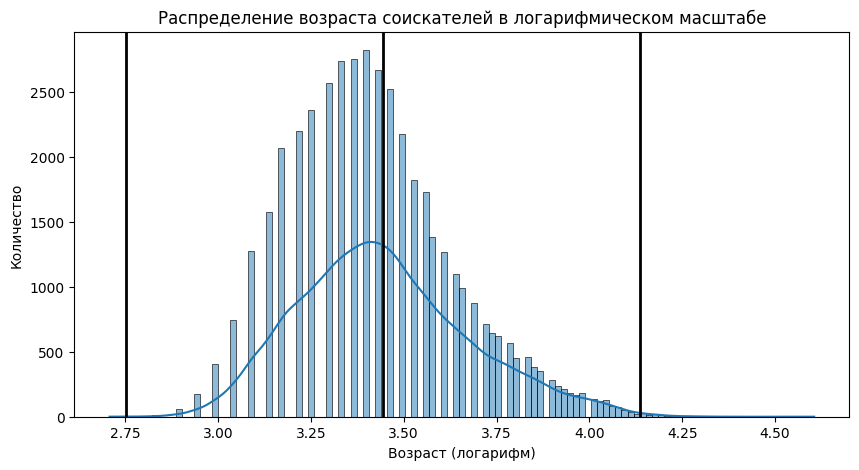

In [39]:
# Создадим переменную с логарифмом возраста
age_log = np.log(hh_full['Возраст'])

fig = plt.figure(figsize=(10, 5))
                    
histplot = sns.histplot(
    x=age_log,
    kde=True
);

# Добавим линию среднего и границы интервала по методу трёх сигм
histplot.axvline(age_log.mean(), color='k', lw=2)
histplot.axvline(age_log.mean() - 3*age_log.std(), color='k', lw=2)
histplot.axvline(age_log.mean() + 3*age_log.std(), color='k', lw=2)

histplot.set_title('Распределение возраста соискателей в логарифмическом масштабе');
histplot.set_xlabel('Возраст (логарифм)');
histplot.set_ylabel('Количество');

# Рассчитаем коэффициент ассимметрии
print('Коэффициент ассиметрии:', age_log.skew())

In [40]:
# Найдём выбросы в возрасте с помощью метода z-отклонений
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    # Функция получает на вход следующие данные:
    # data - исходный DataFrame
    # feature - название признака, который надо исследовать на выбросы
    # log_scale - нужно ли логарифмировать признак
    # left, right - на сколько сигм влево и вправо от среднего лежат границы интервала
    
    # Функция возвращает два DataFrame:
    # outliers - вычисленные выбросы
    # cleaned - DataFrame, очищенный от выбросов 
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# Выведем таблицу с выбросами для логарифмического масштаба и с границей в четыре сигмы справа
outliers, cleaned = outliers_z_score_mod(data=hh_full, feature='Возраст', log_scale=True, right=4)
display(outliers)


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,среднее,М,15,2.0,Санкт-Петербург,False,False,False,True,False,False,False,False,True,True,False,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,среднее специальное,М,15,3.0,другие,False,False,True,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,False,True,True,True,True,False,True,True,False,True,False,False,60000.0


Комментарии к заданию
1. Как видим из диаграммы, распределение возраста ассимметрично вправо (коэффициент ассимметрии положительный). Следовательно, для улучшения результатов метода z-отклонений нужно увеличить границу интервала справа)
2. По методу z-отклонений всего трое соискателей попало в выбросы: двое пятнадцатилетних и один столетний.

In [41]:
# Удалим строки с выбросами из итоговой таблицы
hh_full = hh_full.drop(outliers.index)

#Посмотрим на информацию по итоговой таблице
display(hh_full.info())

# Сохраним итоговую таблицу в файл hh_result.csv
#hh_full.to_csv('data/hh_result.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44482 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44482 non-null  object 
 1   Последнее/нынешнее место работы  44482 non-null  object 
 2   Последняя/нынешняя должность     44482 non-null  object 
 3   Обновление резюме                44482 non-null  object 
 4   Авто                             44482 non-null  object 
 5   Образование                      44482 non-null  object 
 6   Пол                              44482 non-null  object 
 7   Возраст                          44482 non-null  int64  
 8   Опыт работы (месяц)              44482 non-null  float64
 9   Город                            44482 non-null  object 
 10  Готовность к переезду            44482 non-null  bool   
 11  Готовность к командировкам       44482 non-null  bool   
 12  полная занятость  

None